In [23]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Others
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

cmap=sns.color_palette('Blues_r')

In [2]:
# Load data
df = pd.read_csv(r'C:\Users\jerem\Downloads/data.csv')

print(f"Number of row/records: {df.shape[0]}")
print(f"Number of columns/variables: {df.shape[1]}")
df.head()

Number of row/records: 3898
Number of columns/variables: 12


,var0,var1,Var2,var3,var4,var5,var6,var7,var8,var9,var10,target
0,6.0,0.24,0.27,1.9,0.048,40.0,170.0,0.99380,3.64,0.54,10.00,7.0
1,6.5,0.29,0.31,1.7,0.035,24.0,79.0,0.99053,3.27,0.69,11.40,7.0
2,5.3,0.40,0.25,3.9,0.031,45.0,130.0,0.99072,3.31,0.58,11.75,7.0
3,8.3,0.20,0.49,1.7,0.038,38.0,167.0,0.99390,3.05,0.37,10.10,6.0
4,6.9,0.19,0.35,13.5,0.038,49.0,118.0,0.99546,3.00,0.63,10.70,6.0


In [3]:
# raw data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    3898 non-null   float64
 1   var1    3898 non-null   float64
 2   Var2    3898 non-null   float64
 3   var3    3898 non-null   float64
 4   var4    3898 non-null   float64
 5   var5    3898 non-null   object 
 6   var6    3898 non-null   float64
 7   var7    3898 non-null   float64
 8   var8    3896 non-null   float64
 9   var9    3898 non-null   float64
 10  var10   3898 non-null   float64
 11  target  3897 non-null   float64
dtypes: float64(11), object(1)
memory usage: 365.6+ KB


First Findings:

- There are 3898 rows and 12 columns 
- var5 data type appears as string but it is a number
- var8 has two less cases than other variables
- Target variable contains one less observation than other variables

### Data preprocessing and cleaning

In [5]:
df['var5'].value_counts()

29.0      124
31.0      108
26.0      107
36.0      101
35.0      101
         ... 
2.0         1
289.0       1
97.0        1
112.0       1
“79.5”      1
Name: var5, Length: 124, dtype: int64

Explore var5 values to know the reason it is declared as object. We note that some numbers are in quotes, thus we need to modify this variable. 

In [6]:
# var5 values
df['var5'].unique()

array(['40.0', '24.0', '45.0', '38.0', '49.0', '21.0', '37.0', '32.0',
       '57.0', '101.0', '23.0', '63.0', '18.0', '64.0', '19.0', '43.0',
       '41.0', '48.5', '60.0', '26.0', '75.0', '29.0', '30.0', '52.0',
       '33.0', '39.0', '50.0', '61.0', '34.0', '44.5', '28.0', '35.0',
       '54.0', '59.0', '16.0', '14.0', '13.0', '36.0', '10.0', '56.0',
       '15.0', '70.0', '11.0', '67.0', '27.0', '77.0', '25.0', '22.0',
       '44.0', '17.0', '5.0', '9.0', '48.0', '31.0', '53.0', '8.0',
       '47.0', '42.0', '58.0', '6.0', '46.0', '20.0', '51.0', '12.0',
       '73.0', '4.0', '55.0', '38.5', '69.0', '62.0', '65.0', '52.5',
       '80.0', '7.0', '3.0', '82.5', '66.0', '11.5', '87.0', '41.5',
       '68.0', '72.0', '89.0', '138.5', '146.5', '43.5', '15.5', '124.0',
       '128.0', '81.0', '2.0', '59.5', '71.0', '289.0', '98.0', '79.5',
       '78.0', '79.0', '97.0', '35.5', '60.5', '112.0', '82.0', '108.0',
       '76.0', '122.5', '30.5', '105.0', '88.0', '83.0', '73.5', '74.0',
    

In [18]:
# Remove double quotes
df['var5'] = df['var5'].str.replace('“', '')
df['var5'] = df['var5'].str.replace('”', '')
# Transform into float type
df['var5'] = df['var5'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    3898 non-null   float64
 1   var1    3898 non-null   float64
 2   Var2    3898 non-null   float64
 3   var3    3898 non-null   float64
 4   var4    3898 non-null   float64
 5   var5    3898 non-null   float64
 6   var6    3898 non-null   float64
 7   var7    3898 non-null   float64
 8   var8    3896 non-null   float64
 9   var9    3898 non-null   float64
 10  var10   3898 non-null   float64
 11  target  3897 non-null   float64
dtypes: float64(12)
memory usage: 365.6 KB


In [19]:
# Missing values
df.isnull().sum().sort_values(ascending=False)

var8      2
target    1
var0      0
var1      0
Var2      0
var3      0
var4      0
var5      0
var6      0
var7      0
var9      0
var10     0
dtype: int64

In [20]:
df.describe()

,var0,var1,Var2,var3,var4,var5,var6,var7,var8,var9,var10,target
count,3898.000000,3898.000000,3898.0000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3896.000000,3898.000000,3898.000000,3897.000000
mean,6.857478,0.277378,0.3341,6.405028,0.045759,35.447794,138.313109,0.994045,3.188475,0.488982,10.506904,5.877342
std,0.862851,0.099444,0.1212,5.097639,0.021422,17.125168,42.446527,0.003007,0.152692,0.113755,1.225731,0.896229
min,-1.000000,0.080000,0.0000,-2.000000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,-1.000000
25%,6.300000,0.210000,0.2700,1.700000,0.036000,24.000000,108.000000,0.991740,3.080000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.3200,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.3900,9.900000,0.050000,46.000000,167.000000,0.996120,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.6600,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,11.000000


As mentioned before, variables are not negatives and target value is in [0,10], thus we need to remove those values. Plus, we can replace missing values with the mean value.

In [35]:
# Remove outside values
outside_values = df[(df['target'] < 0) | (df['target'] > 10) | (df['var0'] < 0)]
df = df.drop(outside_values.index).reset_index(drop=True)

# replace NA with mean values
df.fillna(df.mean(), inplace=True)

df.shape

(3895, 12)

### Exploratory Data Analysis

=== Distribution of variables ===


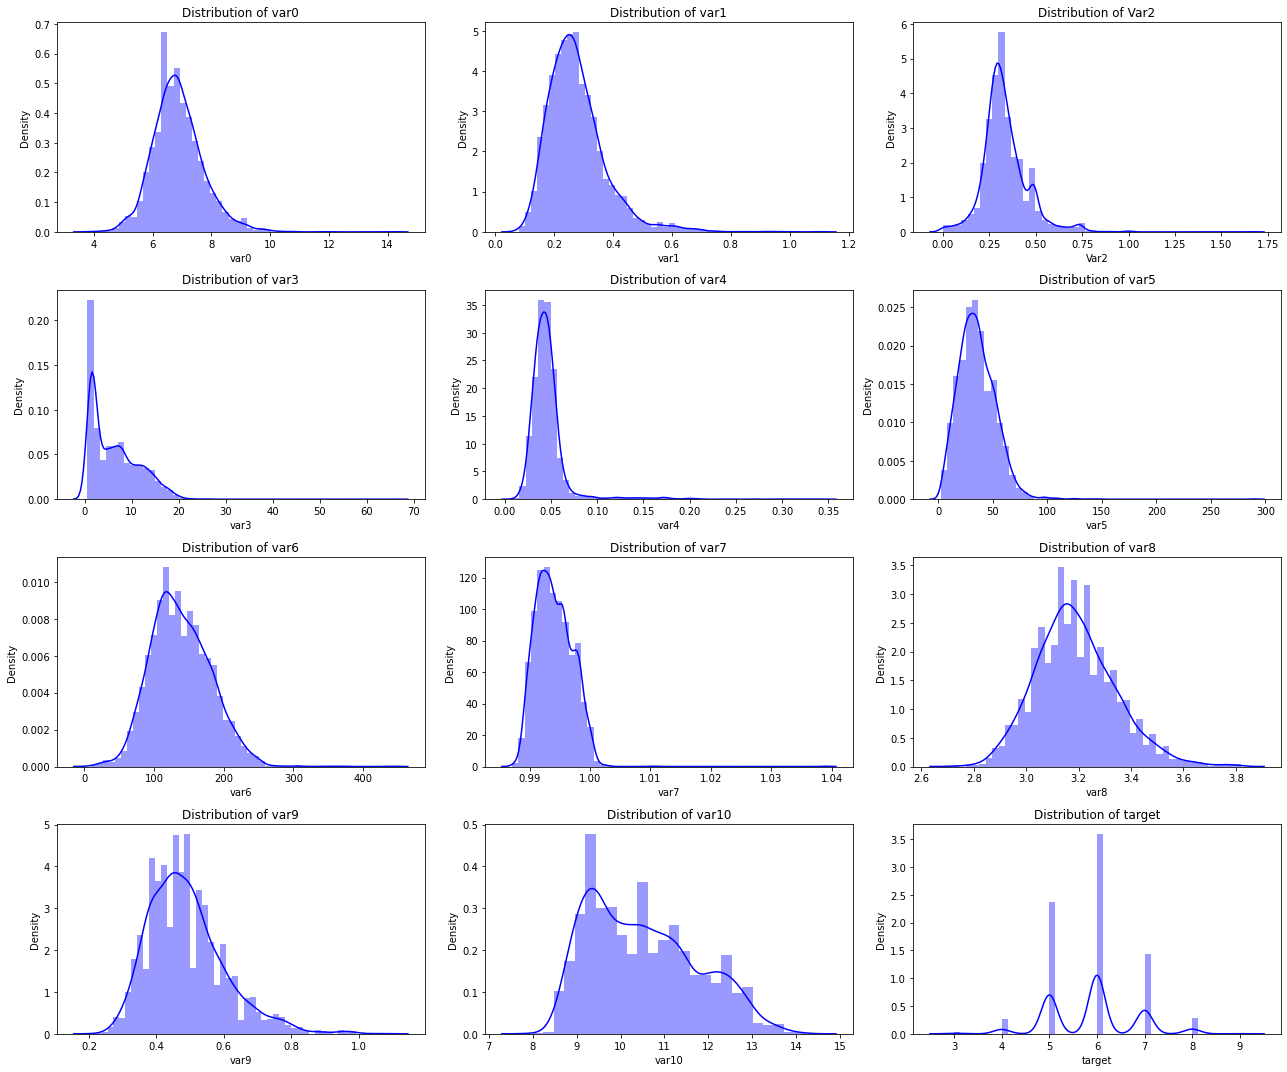

In [36]:
# Check distribution
print(f'=== Distribution of variables ===')
plt.figure(figsize=(18, 15))
for i, col in enumerate(df.columns):
    # Plot distribution 
    plt.subplot(4,3,i+1); sns.distplot(df[col], color='blue')
    plt.title(f'Distribution of {col}')
# Show the plot
plt.tight_layout()
plt.show()

=== Distribution of variables ===


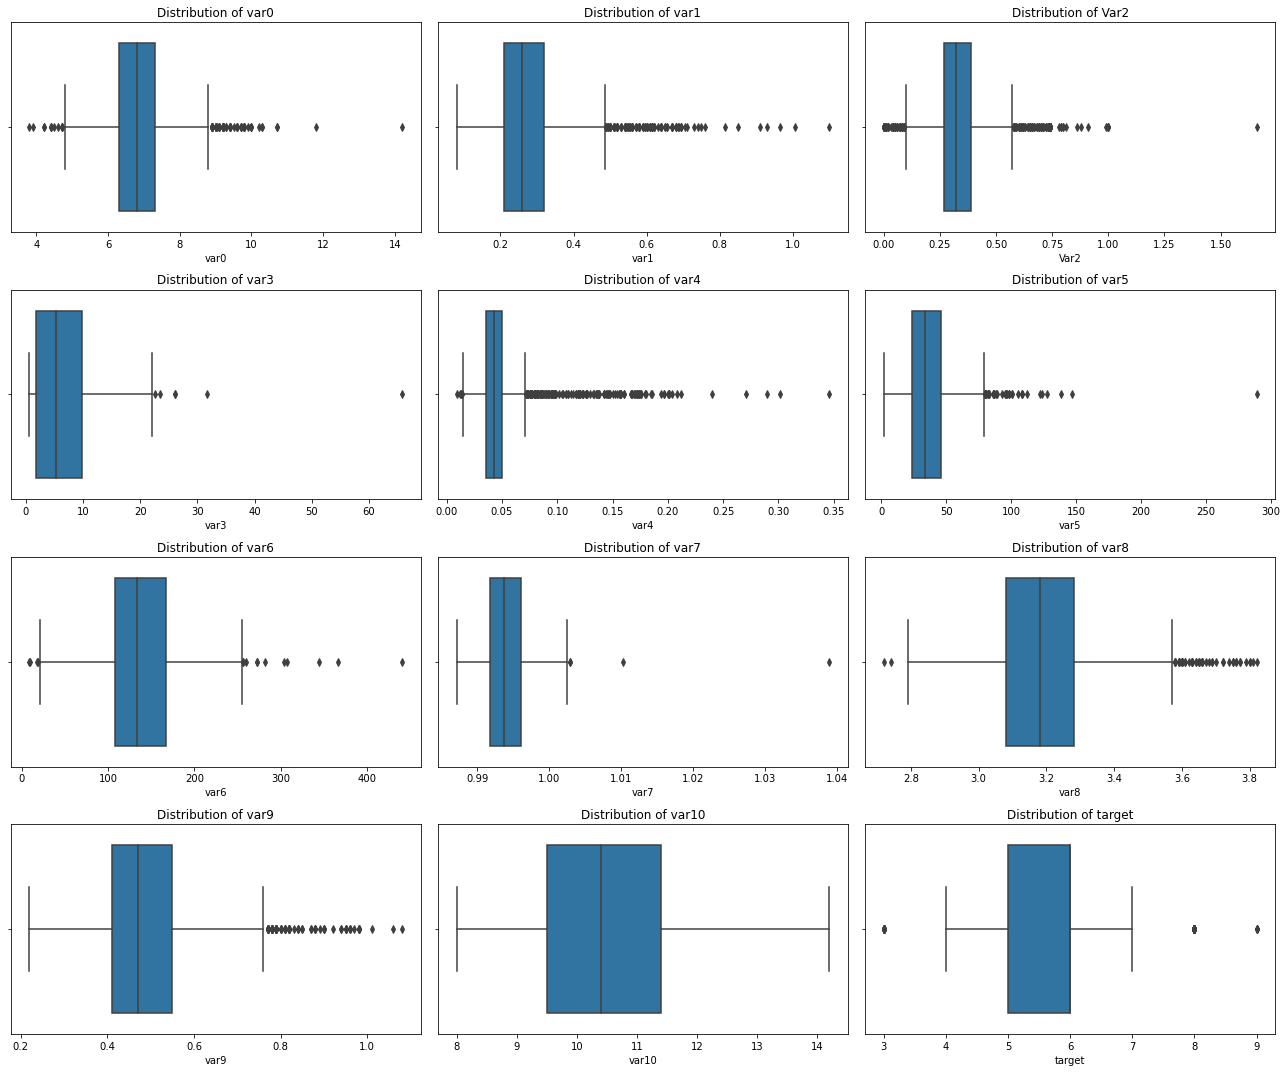

In [37]:
# Check distribution
print(f'=== Distribution of variables ===')
plt.figure(figsize=(18, 15))
for i, col in enumerate(df.columns):
    # Plot distribution 
    plt.subplot(4,3,i+1); sns.boxplot(df[col])
    plt.title(f'Distribution of {col}')
# Show the plot
plt.tight_layout()
plt.show()

In [38]:
# log transform function
def log_transform(data, to_log):
    X = data.copy()
    for item in to_log:
        # Add 1 to the data to prevent infinity values
        X[item] = np.log(1+X[item])
    return X

In [39]:
# log transform
to_log = df.columns.drop('target')
new_df = log_transform(df, to_log)

new_df.describe()

,var0,var1,Var2,var3,var4,var5,var6,var7,var8,var9,var10,target
count,3895.000000,3895.000000,3895.000000,3895.000000,3895.000000,3895.000000,3895.000000,3895.000000,3895.000000,3895.000000,3895.000000,3895.000000
mean,2.055958,0.241996,0.284292,1.753182,0.044540,3.474968,4.885722,0.690164,1.431692,0.395306,2.437424,5.877761
std,0.107128,0.074232,0.087895,0.724649,0.019557,0.524778,0.333703,0.001507,0.036204,0.074293,0.104873,0.885861
min,1.568616,0.076961,0.000000,0.470004,0.008960,1.098612,2.302585,0.686681,1.313724,0.198851,2.197225,3.000000
25%,1.987874,0.190620,0.239017,0.993252,0.035367,3.218876,4.691348,0.689009,1.406097,0.343590,2.351375,5.000000
50%,2.054124,0.231112,0.277632,1.824549,0.042101,3.555348,4.905275,0.690012,1.430311,0.385262,2.433613,6.000000
75%,2.116256,0.277632,0.329304,2.388763,0.048790,3.850148,5.123964,0.691205,1.453953,0.438255,2.517696,6.000000
max,2.721295,0.741937,0.978326,4.201703,0.297137,5.669881,6.089045,0.712450,1.572774,0.732368,2.721295,9.000000


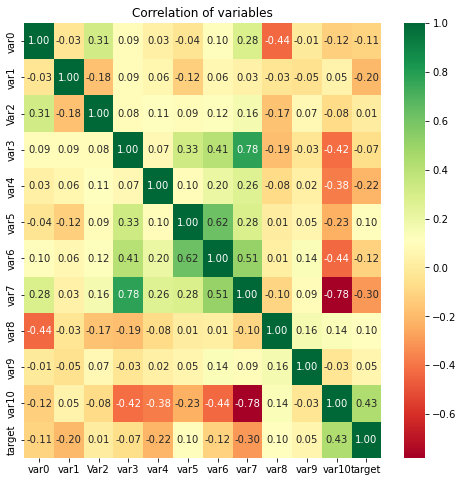

In [40]:
# Correlation of numerical attributes
plt.figure(figsize=(8, 8))
plt.title('Correlation of variables')
sns.heatmap(new_df.corr(), annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

Findings:

- Strong positive relationship between var7 and var3 (0.78)
- Strong negative association between var7 and var10 (-0.78)

The strong relationship between some features shows the presence of multicollinearity. 

### PCA

In [41]:
# Define our features 
X = new_df.drop(['target'], axis = 1)

# Define our labels
y = new_df['target']

# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale the features and set the values to a new variable
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

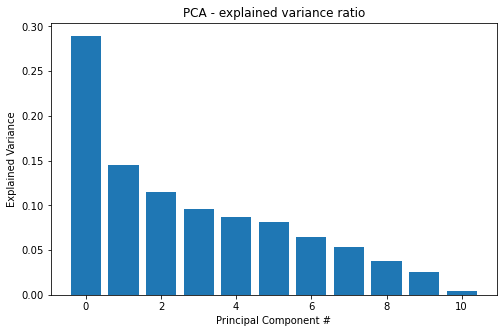

In [43]:
# Import PCA
from sklearn.decomposition import PCA

# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_features)
exp_variance = pca.explained_variance_ratio_

# plot the explained variance using a barplot
fig, ax = plt.subplots(figsize = (8,5))
ax.bar(range(pca.n_components_), exp_variance)
ax.set_title('PCA - explained variance ratio')
ax.set_ylabel("Explained Variance")
ax.set_xlabel('Principal Component #')
plt.show()

We can also look at the cumulative explained variance plot to determine how many features are required to explain, say, about 90% of the variance. Once we determine the appropriate number of components, we can perform PCA with that many components, ideally reducing the dimensionality of our data.

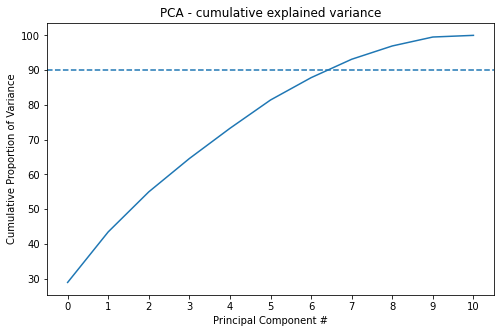

In [51]:
# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)*100

# Plot the cumulative explained variance and draw a dashed line at 0.85.
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(cum_exp_variance)
ax.set_title('PCA - cumulative explained variance')
ax.set_xticks(np.arange(0,11))
ax.set_ylabel("Cumulative Proportion of Variance")
ax.set_xlabel('Principal Component #')
ax.axhline(y=90, linestyle='--')

# choose the n_components where about 85% of our variance can be explained
n_components = 6

# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components, random_state=42)
pca.fit(scaled_features)
pca_projection = pca.transform(scaled_features)

### Models

In [59]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# set seed
seed = 42

# Split our data
X_train, X_test, y_train, y_test = train_test_split(pca_projection, y, test_size = 0.3, random_state = seed)

In [61]:
# Import models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Run Models
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state = seed)
rf = RandomForestRegressor(random_state = seed)
xgb = GradientBoostingRegressor(random_state = seed)

classifiers = [('Linear Regression', lr),
               ('Decision Tree', dt),
               ('Random Forest', rf),
               ('Gradient Boosting', xgb)]

# Evaluate models using R2 score
print("R2 score: \n")
for reg_name, reg in classifiers:
    #training set
    reg.fit(X_train, y_train)
    #test set
    y_pred = reg.predict(X_test)
    # Evaluar la precisión de los modelos en el test set
    print('{:s} : {:.3f}'.format(reg_name, r2_score(y_test, y_pred)))

Linear Regression : 0.233
Decision Tree : -0.100
Random Forest : 0.438
Gradient Boosting : 0.365


In [65]:
# Evaluate models using RMSE score
print("RMSE score: \n")
for reg_name, reg in classifiers:
    #training set
    reg.fit(X_train, y_train)
    #test set
    y_pred = reg.predict(X_test)
    # Evaluar la precisión de los modelos en el test set
    print('{:s} : {:.3f}'.format(reg_name, np.sqrt(mean_squared_error(y_test, y_pred))))

RMSE score: 

Linear Regression : 0.771
Decision Tree : 0.923
Random Forest : 0.660
Gradient Boosting : 0.701


In [68]:
# Evaluate models using Accuracy score
print("Accuracy score: \n")
for reg_name, reg in classifiers:
    #training set
    reg.fit(X_train, y_train)
    #test set
    y_pred = reg.predict(X_test)
    # Evaluar la precisión de los modelos en el test set
    print('{:s} : {:.3f}'.format(reg_name, 100 - np.mean(100 * (abs(y_pred - y_test) / y_test))))

Accuracy score: 

Linear Regression : 89.283
Decision Tree : 89.745
Random Forest : 91.339
Gradient Boosting : 90.321


From the above, Random Forest appears as the best model.

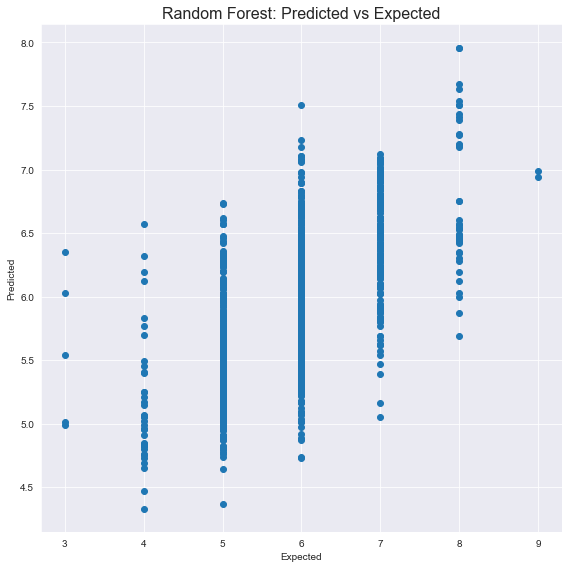

In [66]:
# Train our random forest model and predict labels for the test set
rf = RandomForestRegressor(random_state = seed)
rf.fit(X_train, y_train)
pred_labels_rf = rf.predict(X_test)

# Plot
sns.set_style('darkgrid')
plt.figure(figsize=(8, 8))
# Scatter
plt.scatter(y_test, pred_labels_rf)
plt.title('Random Forest: Predicted vs Expected', fontsize = 16)
plt.ylabel('Predicted')
plt.xlabel('Expected')          
# Show the plot
plt.tight_layout()
plt.show()

In [72]:
# Improve the hyperparameters
from sklearn.model_selection import GridSearchCV

# Define the parameter sets to test
param_grid = {'n_estimators': [10, 20, 30], 'max_features': ['auto', 'log2'], 'max_depth': [3,10] 
             }

# Define the model to use
model = RandomForestRegressor(random_state=seed)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
CV_model.best_params_

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 30}

In [73]:
# Input the optimal parameters in the model
model = RandomForestRegressor(max_depth=10, max_features='auto', n_estimators=30, n_jobs=-1, random_state=seed)

# Get results from your model 
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluar la precisión de los modelos en el test set
print(f"R2 score: {r2_score(y_test, y_pred)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred)}")
print(f"Accuracy score: {100 - np.mean(100 * (abs(y_pred - y_test) / y_test))}")

R2 score: 0.36521157913535496
RMSE: 0.49189656306665597
Accuracy score: 90.3208621461851


The change of hyperparameters did not improve the model.

### Feature importance

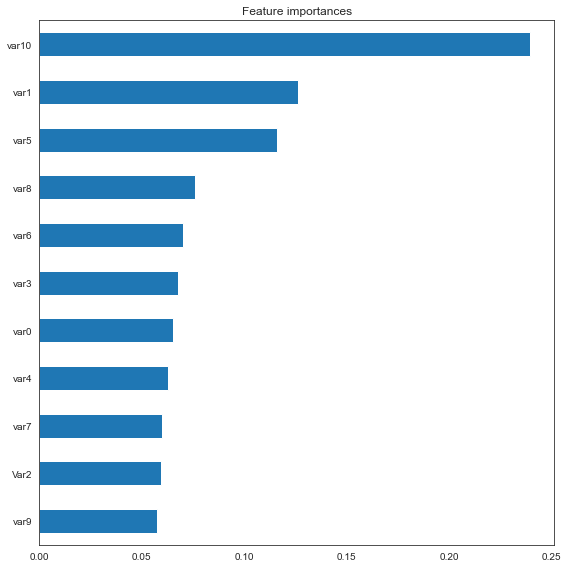

In [69]:
# Train our random forest model and predict labels for the test set
rf_fi = RandomForestRegressor(random_state = seed)
rf_fi.fit(X, y)

# Plot feature importance
sns.set_style('white')
plt.figure(figsize=(8, 8))
# Plot feature importance
forest_importances = pd.Series(rf_fi.feature_importances_, index=X.columns).sort_values()
forest_importances.plot(kind = 'barh')
plt.title("Feature importances")
plt.tight_layout()
plt.show()

var10, var1 y var5 are the most important features to explain target.